### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# To check the basic information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

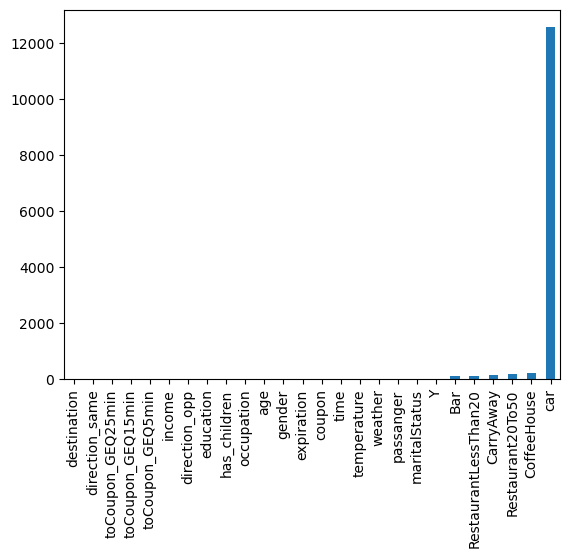

In [5]:
# To plot the missing data by column
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('images/missing_plot_.png')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# Column Car has the most number of null. We want to examine the rows that are not null, what are the attributes in the column Car. 
carnotnull = data.loc[data['car'].notnull()]
print(type(carnotnull))
carnotnull.head()['car']

<class 'pandas.core.frame.DataFrame'>


1237    Scooter and motorcycle
1238    Scooter and motorcycle
1239    Scooter and motorcycle
1240    Scooter and motorcycle
1241    Scooter and motorcycle
Name: car, dtype: object

In [14]:
# now we know the car column is describing the type of car, or if the person knows how to drive a car. Given there are 10,000+ null values,
# I am going to drop this column 

data = data.drop(columns=["car"])

In [15]:
# I now want to drop the rows where there are some missing values in columns "Bar", "CoffeeHouse" etc because it's a small set of data
data1 = data.dropna(subset=['Bar', 'CoffeeHouse','RestaurantLessThan20','CarryAway','Restaurant20To50'])

4. What proportion of the total observations chose to accept the coupon?



In [16]:
# We can use the mean of "Y" column to represent the propotion of people accepted the coupon
acceptance_rate = data1['Y'].mean()
acceptance_rate

np.float64(0.5693352098683666)

In [ ]:
# So the acceptance rate is about 57%

5. Use a bar plot to visualize the `coupon` column.

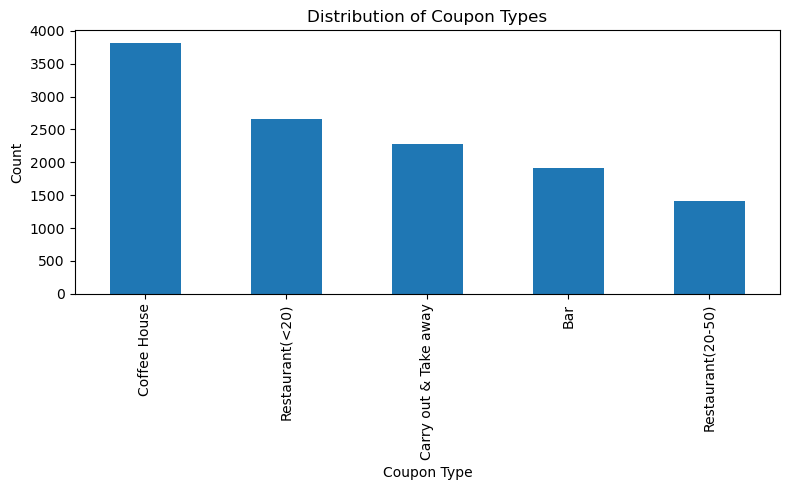

In [17]:
# Bar plot of coupon counts

plt.figure(figsize=(8,5))
data1['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Finding: there are more Coffee House coupons distributed. 

6. Use a histogram to visualize the temperature column.

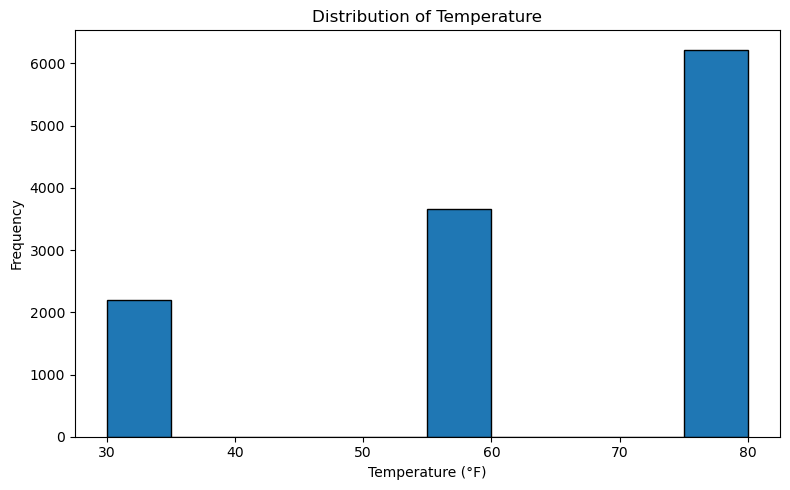

In [18]:

plt.figure(figsize=(8,5))
plt.hist(data1['temperature'], bins=10, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Create a new DataFrame with only bar coupons
bar_coupons = data1[data1['coupon'] == 'Bar']

# Check the first few rows
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [20]:
# We can use the mean of "Y" column to represent the propotion of people accepted the coupon
acceptance_rate_bar = bar_coupons['Y'].mean()
acceptance_rate_bar


np.float64(0.41191845269210664)

In [ ]:
# Finding: the bar coupon acceptance rate is lower than average. There are other coupon types that have a higher acceptance rate. 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
# Create two groups based on bar visit frequency
few_bar_goers = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
frequent_bar_goers = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
rate_few = few_bar_goers['Y'].mean()
rate_frequent = frequent_bar_goers['Y'].mean()

print("Acceptance rate for people who go to bars 3 or fewer times/month:", round(rate_few, 3))
print("Acceptance rate for people who go to bars more than 3 times/month:", round(rate_frequent, 3))


Acceptance rate for people who go to bars 3 or fewer times/month: 0.373
Acceptance rate for people who go to bars more than 3 times/month: 0.762


In [ ]:
# Finding: the acceptance rate for people who go to bars more frequently is significantly higher than those who do not, x2.5 times high
# Action items: we should send bar coupons to people who go to bars more

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


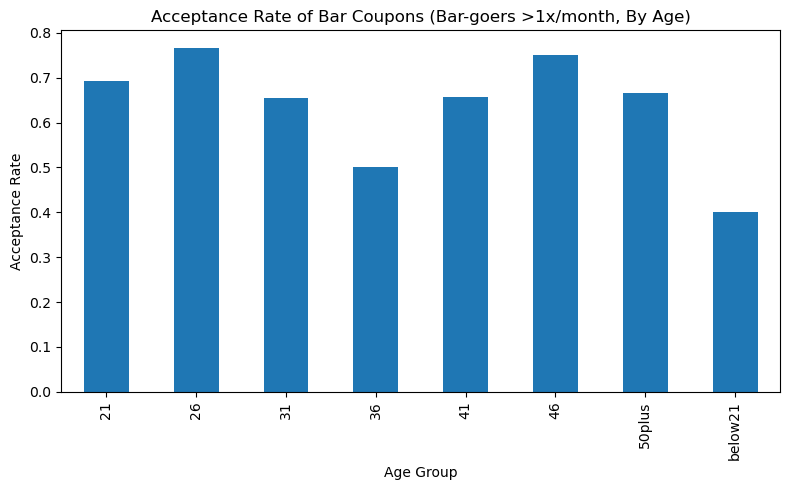

In [26]:
# Create a group for drivers who go to a bar more than once a month 
once_month_bar_goers = bar_coupons[bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])]

# Calculate acceptance rate by age group (within those who go to bars more than once/month)
acceptance_rate_bar_by_age = once_month_bar_goers.groupby('age')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_bar_by_age.plot(kind='bar')
plt.title('Acceptance Rate of Bar Coupons (Bar-goers >1x/month, By Age)')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Finding: the age group below 21 has a significantly lower acceptance rate for bar coupons

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
# First, I just want to calculate the acceptance rate for this specific group

# Filter drivers who meet all conditions
filtered_group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming, Fishing & Forestry')
]

# Calculate acceptance rate
acceptance_rate = filtered_group1['Y'].mean()

print("Acceptance rate for drivers who go to bars >1x/month, no kid passengers, non-farming occupations:",
      round(acceptance_rate, 3))


Acceptance rate for drivers who go to bars >1x/month, no kid passengers, non-farming occupations: 0.709


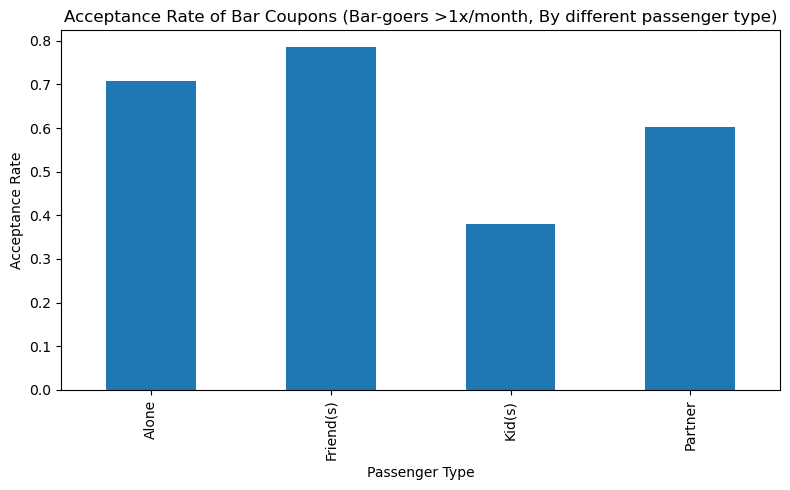

In [29]:
# Now I want to compare the acceptance rate of different types of passengers 
acceptance_rate_bar_by_passenger = once_month_bar_goers.groupby('passanger')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_bar_by_passenger.plot(kind='bar')
plt.title('Acceptance Rate of Bar Coupons (Bar-goers >1x/month, By different passenger type)')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Finding: for bar-goers, they are most likely to accept the bar coupon when they're driving with friend(s), 
#and least likely when they have kids as passengers

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
# First, let's calculate the different acceptance rates above: 
# Drivers who go to bars more than once a month, had passengers not kids, and were not widowed
cond1 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)
rate1 = bar_coupons.loc[cond1, 'Y'].mean()

# Drivers who go to bars more than once a month and are under 30
cond2 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21', '21', '21 to 25', '26 to 30']))
)
rate2 = bar_coupons.loc[cond2, 'Y'].mean()

# Drivers who go to cheap restaurants more than 4 times a month and have income < $50K
cond3 = (
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin([
        'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
    ]))
)
rate3 = bar_coupons.loc[cond3, 'Y'].mean()

# Print all three acceptance rates
print("Go to bars >1x/month, no kid passengers, not widowed:", round(rate1, 3))
print("Go to bars >1x/month and under 30:", round(rate2, 3))
print("Go to cheap restaurants >4x/month and income <50K:", round(rate3, 3))


Go to bars >1x/month, no kid passengers, not widowed: 0.709
Go to bars >1x/month and under 30: 0.675
Go to cheap restaurants >4x/month and income <50K: 0.456


In [32]:
# Findings: passengers without kid passengers and are not widowed have a really high acceptance rate, compared to avg bar coupon
# Findings: passengers that are quite young, below 30, also had a relatively higher acceptance rate
# Findings: passengers who go to cheaper restaurants more often and have less income have a relatively lower acceptance rate

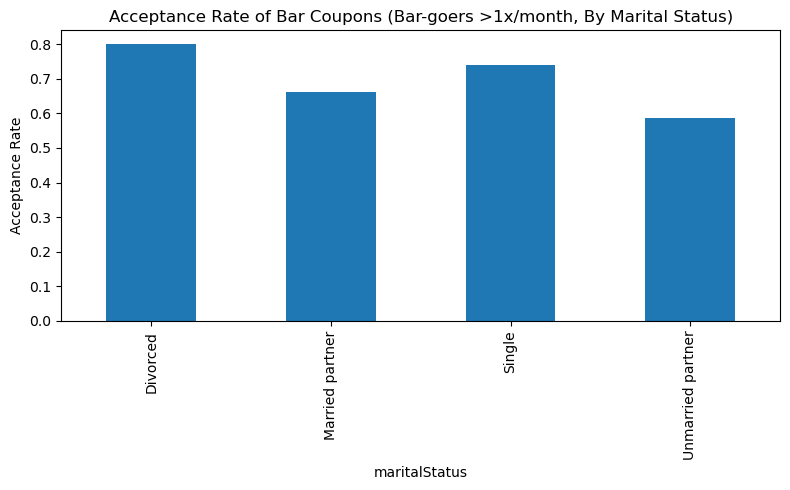

In [33]:
# Now I want to compare the acceptance rate of passengers with different marital status

acceptance_rate_bar_by_marital = once_month_bar_goers.groupby('maritalStatus')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_bar_by_marital.plot(kind='bar')
plt.title('Acceptance Rate of Bar Coupons (Bar-goers >1x/month, By Marital Status)')
plt.xlabel('maritalStatus')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [34]:
# Findings: the drivers who are divorced had the highest acceptance rate while those with unmarried partners have the lowest

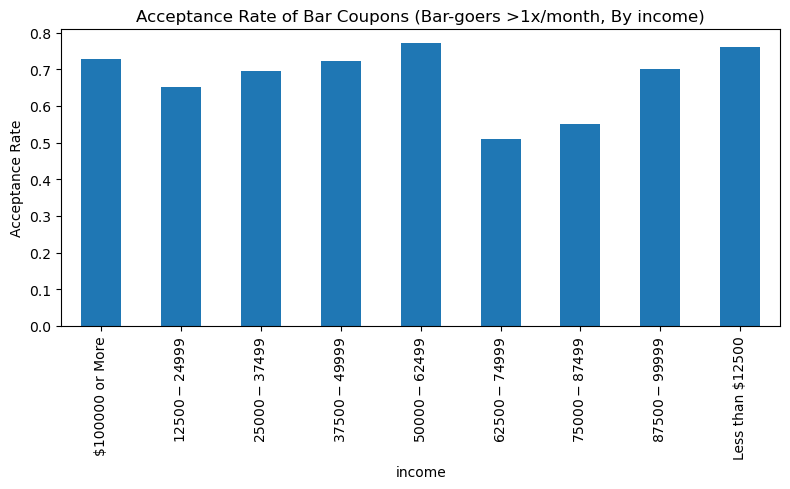

In [36]:
# Now I want to compare the acceptance rate of passengers with different income level

acceptance_rate_bar_by_income = once_month_bar_goers.groupby('income')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_bar_by_income.plot(kind='bar')
plt.title('Acceptance Rate of Bar Coupons (Bar-goers >1x/month, By income)')
plt.xlabel('income')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Finding: surprisingly, the acceptance rate of the drivers in the middle income bucket (62500 - 87499) are the lowest while 
# higher or lower income drivers accept the coupon more. 

# Action item: it may not be the best idea to just target drivers with highest income. Clearly drivers in the lower half of the income bucket
# accept bar coupons more often. 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [37]:
## Findings on Bar Coupon Acceptance

### Finding 1: Frequent bar-goers are far more likely to accept bar coupons  
- Acceptance rate for people who go to bars ≤3 times/month: 37.3% 
- Acceptance rate for people who go to bars >3 times/month: 76.2% 
- 2.5× higher acceptance among frequent bar-goers.  

**Action:**  
Focus bar coupon delivery on users who frequent bars more than 3× per month.  
These users have the strongest behavioral alignment and highest likelihood of redemption.

---

### Finding 2: Younger adults (under 30) are more receptive, while those under 21 rarely accept  
- Acceptance rate for bar-goers >1×/month and under 30: 67.5%
- Acceptance rate for below 21 group: significantly lower 

**Action:**  
Target bar coupon delivery to ages 26–35, where both legal drinking age and lifestyle alignment peak.

---

### Finding 3: Driving context matters — social rides increase acceptance  
- Acceptance rate for bar-goers >1×/month, no kid passengers, not widowed: 70.9% 
- Drivers with friends or partners are most receptive; those with kids are least.  

**Action:**  
Leverage contextual cues (e.g., no children in the car, social passengers) to time bar coupon delivery for higher success rates.

---

### Finding 4: Income and lifestyle segments influence acceptance differently  
- Cheap restaurant goers (>4×/month) with income <50K: 45.6% acceptance
- Middle-income drivers ($62.5K–$87.5K) show the lowest acceptance 
- Both higher and lower income brackets are more likely to accept  

**Action:**  
Avoid over-targeting high-income drivers.  
Focus bar coupon campaigns on lower-to-mid income segments where engagement is stronger.

---

### Finding 5: Marital status affects acceptance   
- Divorced drivers show the highest acceptance 
- Unmarried partners show the lowest  

**Action:**  
Incorporate marital and passenger context into predictive targeting models to improve personalization.

SyntaxError: invalid character '≤' (U+2264) (2709853051.py, line 5)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [38]:
# I would like to explore CoffeeHouse coupon
# Create a new DataFrame with only coffee coupons
cf_coupons = data1[data1['coupon'] == 'Coffee House']

# Check the first few rows
cf_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [39]:
# Next, let's look at the average acceptance rate for coffeehouse

# We can use the mean of "Y" column to represent the propotion of people accepted the coupon
acceptance_rate_cf = cf_coupons['Y'].mean()
print("Acceptance rate for Coffee House coupon is:", round(acceptance_rate_cf, 3))

Acceptance rate for Coffee House coupon is: 0.496


In [40]:
# Now I will examine if going to coffee house as a habit will impact if people accept coffee coupons
few_cf_goers = cf_coupons[cf_coupons['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
frequent_cf_goers = cf_coupons[cf_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
rate_few_cf = few_cf_goers['Y'].mean()
rate_frequent_cf = frequent_cf_goers['Y'].mean()

print("Acceptance rate for people who go to bars 3 or fewer times/month:", round(rate_few_cf, 3))
print("Acceptance rate for people who go to bars more than 3 times/month:", round(rate_frequent_cf, 3))

Acceptance rate for people who go to bars 3 or fewer times/month: 0.446
Acceptance rate for people who go to bars more than 3 times/month: 0.673


In [42]:
# Finding: the acceptance rate for people who go to coffee house more frequently is significantly higher than those who do not, x1.5 times high
# Interestingly, the difference is not as dramatic as the bar frequest goers vs. not

# Action items: we should send coffee coupons to people who go to coffee house more

In [43]:
# Next, I want to focus on only the drivers who have at least gone to coffee house at least once per month

once_month_cf_goers = cf_coupons[cf_coupons['CoffeeHouse'].isin(['1~3','4~8', 'gt8'])]

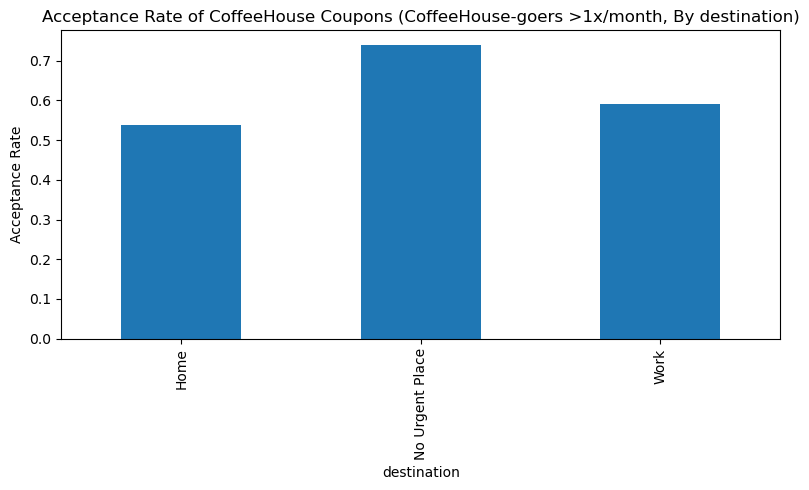

In [44]:
# Next, let's examine if destination matters to if people will accept the coffee coupon or not 

acceptance_rate_cf_by_destination = once_month_cf_goers.groupby('destination')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_cf_by_destination.plot(kind='bar')
plt.title('Acceptance Rate of CoffeeHouse Coupons (CoffeeHouse-goers >1x/month, By destination)')
plt.xlabel('destination')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [45]:
# Finding: it's very clear that if people have no urgent place to go, the acceptance rate is much higher than when they need to go to work or home
# Finding: Also people prefer to stop by coffee house and use the coupon more if they're heading to work instead of home. 

# Action item: we want to target drivers who are not heading to a specific destination like home or work. 

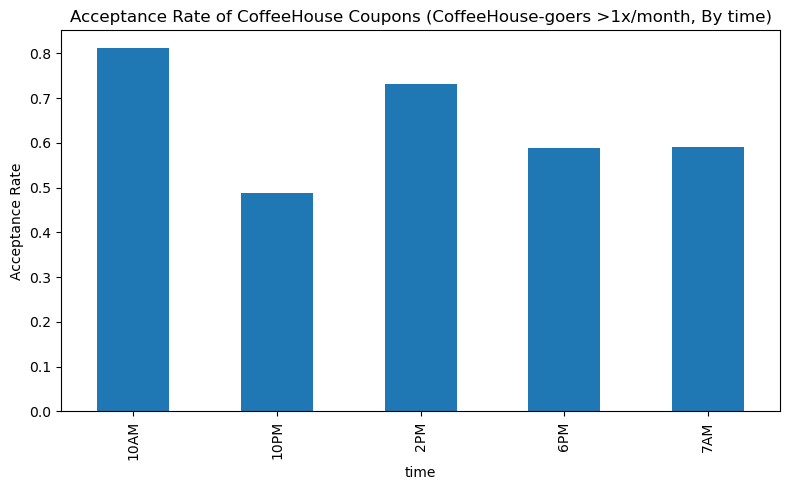

In [46]:
# We know coffee is usually consumed in the morning, so I want to examine if time matters to coffee house coupon acceptance too
acceptance_rate_cf_by_time = once_month_cf_goers.groupby('time')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_cf_by_time.plot(kind='bar')
plt.title('Acceptance Rate of CoffeeHouse Coupons (CoffeeHouse-goers >1x/month, By time)')
plt.xlabel('time')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [47]:
# Finding: not surprisingly, people accept coffee house coupons way more in the morning, followed by early afternoon

# Action item: we should target drivers with coffee coupons in the morning instead of 10pm

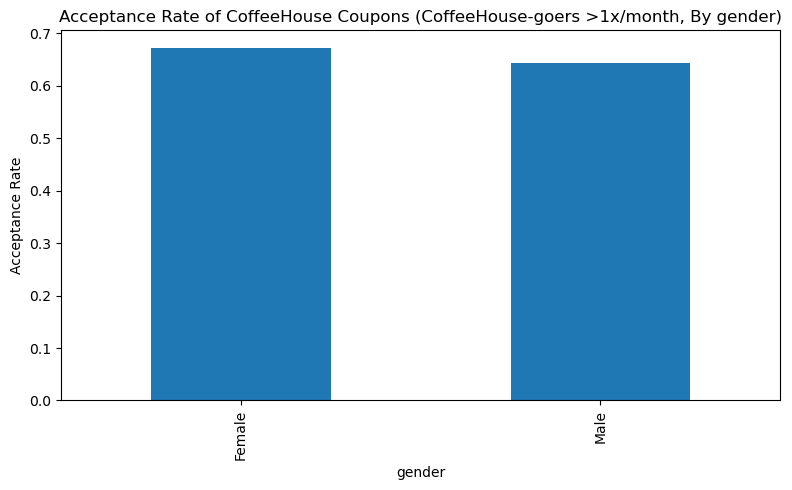

In [48]:
# Now, I wonder if gender matters for coffee coupon

acceptance_rate_cf_by_gender = once_month_cf_goers.groupby('gender')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_cf_by_gender.plot(kind='bar')
plt.title('Acceptance Rate of CoffeeHouse Coupons (CoffeeHouse-goers >1x/month, By gender)')
plt.xlabel('gender')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [49]:
# Finding: interestingly, Female drivers accept coffee coupons more than male

# Action item: we may want to target female drivers with coffee coupons more than male

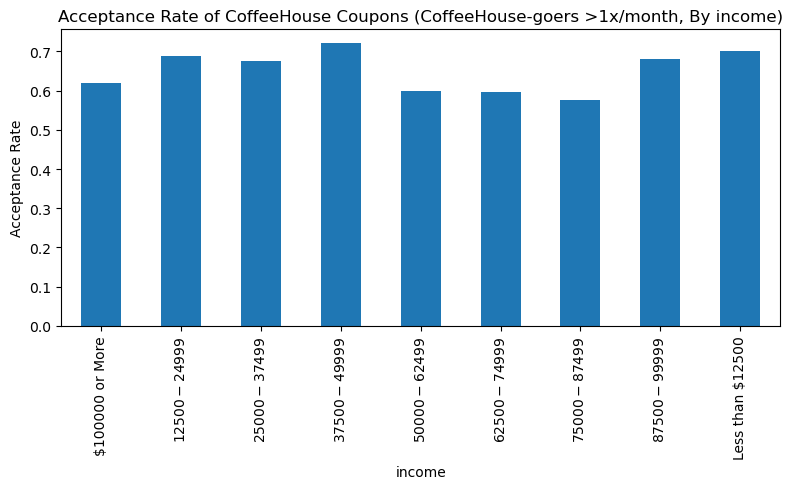

In [50]:
# Coffee is less expensive compared to a meal. So I wonder if income still matters for coffee coupons, or not as much

acceptance_rate_cf_by_income = once_month_cf_goers.groupby('income')['Y'].mean().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
acceptance_rate_cf_by_income.plot(kind='bar')
plt.title('Acceptance Rate of CoffeeHouse Coupons (CoffeeHouse-goers >1x/month, By income)')
plt.xlabel('income')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [52]:
# Finding: similar to bar coupons, we see the lowest acceptance rate of coffee coupons for mid-level income. 
# The hypothesis here is lower income population may value coupons more, while top income population consume coffee more. We can 

# Action item: again, we may want to target coffee coupons to lower and higher income drivers, and not so much in the middle 

In [ ]:
## Findings on Coffee House Coupon Acceptance

### Finding 1: Frequent coffeehouse visitors are more likely to accept coffee coupons  
**Evidence:**  
- Overall coffeehouse coupon acceptance rate: **49.6%**  
- Acceptance rate for people who visit coffeehouses ≤3 times/month: **44.6%**  
- Acceptance rate for people who visit coffeehouses >3 times/month: **67.3%**  
→ **1.5× higher acceptance** among frequent coffee drinkers, though not as steep as bar-goers.  

**Action:**  
Prioritize coffee coupons for members who regularly visit coffeehouses, as they are significantly more responsive to these offers.

---

### Finding 2: Destination urgency strongly impacts acceptance  
**Evidence:**  
- Drivers with **no urgent destination** have much higher acceptance rates than those heading home or to work.  
- Among destination types, **“heading to work”** drivers are more likely to accept than those **“heading home.”**

**Action:**  
Target coffee coupons to drivers with **flexible or casual destinations**, or those on their way to work. Avoid delivering offers when drivers are clearly heading home.

---

### Finding 3: Coffee coupons are most effective in the morning  
**Evidence:**  
- Acceptance rates peak during **morning hours**, followed by early afternoon.  
- Late-day or evening coupons (e.g., around 10PM) see minimal engagement.  

**Action:**  
Deliver coffee coupons **early in the day**, when coffee consumption intent is naturally higher.

---

### Finding 4: Female drivers are more responsive to coffee coupons  
**Evidence:**  
- Female drivers consistently show **higher acceptance rates** than male drivers across multiple conditions.  

**Action:**  
Include **gender-based targeting** where permissible, increasing morning coffee coupon exposure for female drivers.

---

### Finding 5: Income level shows a U-shaped relationship with coffee coupon acceptance  
**Evidence:**  
- **Mid-income** drivers (e.g., \$62.5K–\$87.5K) have the **lowest acceptance rate**.  
- **Lower-income** drivers may value coupons more.  
- **Higher-income** drivers likely consume coffee more frequently regardless of discounts.  

**Action:**  
Focus coffee coupon targeting on **lower** and **higher** income groups, who both show higher responsiveness than the middle segment.

---


In [ ]:
--------------- Next Independant Investigation ----------------------

In [53]:
# Finally, I want to compare between the coupon types 
# First, let's see which coupon type has the highest and lowest acceptance rate
# Calculate acceptance rate by coupon type
acceptance_by_coupon = (
    data1.groupby('coupon')['Y']
    .agg(['count', 'mean'])
    .rename(columns={'count': 'Total Observations', 'mean': 'Acceptance Rate'})
    .sort_values('Acceptance Rate', ascending=False)
)

# Display the table
print(acceptance_by_coupon)


                       Total Observations  Acceptance Rate
coupon                                                    
Carry out & Take away                2280         0.737719
Restaurant(<20)                      2653         0.709009
Coffee House                         3816         0.496331
Restaurant(20-50)                    1417         0.446013
Bar                                  1913         0.411918


In [ ]:
# Finding: we see that Carry out has the highest acceptance rate and Bar has the lowest

# Action item: we should send out more carry out coupons and fewer Bar / Restaurant coupons. 

In [ ]:
# This the end of the analysis 